<a id="top" style="float:left;" href="http://dynfluid.ensam.eu/"><img style="height:100px;" src="https://hpp.education/Lessons/omnes-docet-ubique.png"/></a>
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:80px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center></center>

<center>
<h3 style="color:#888888;"> <i>--  Simulation numérique en mécanique des fluides  --</i> </h3>
<h1> TP n°5 </h1>
<h3> Ecoulements potentiels </h3>
<h4> TP Noté à déposer sur le Moodle </h4>
<h6><a href="mailto:simon.marie@lecnam.net">simon.marie@lecnam.net</a></h6>
</center>

<i> Veuillez indiquer Votre Nom dans le fichier du notebook</i>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# la librairie time nous sera utile pour calculer le temps d'execution des scripts
import time 
#Option pour afficher les figures dans le notebook et eviter le plt.show():
%matplotlib inline   

On se propose dans ce TP, de se familiariser avec la représentation des écoulements potentiels.

Les écoulements potentiels sont des solutions particulières des équations de Navier-Stokes simplifiées dans le cas incompressible ($div(\mathbf{u})=0$), non visqueux, stationnaire et irrotationel ($\mathbf{rot}(\mathbf{u})=\mathbf{0}$).

La dernière hypothèse et la proprièté de l'opérateur rotationel $\mathbf{rot}(\mathbf{grad})=\mathbf{0}$ permet de supposer l'existence d'un potentiel des vitesses $\varphi$ tel que $\mathbf{u}=\mathbf{grad}(\varphi)$. L'hypothèse incompressible permet de suposer l'existence d'une fonction de courant $\psi$.

L'objectif de ce TP est de représenter quelques écoulements potentiels élémentaires et d'en tracer les lignes caractéristiques.




<h1> 1 - Maillage du plan </h1>

On considére un écoulement représenté par le nombre comlexe $z=x+iy$ et décrit par le potentiel complexe:

$$
F(z)=\varphi + i\Psi
$$


<b>Créer deux vecteurs $x$ et $y$ représentant l'espace discret sur le segment $[-5,5]$ avec un pas $\Delta x=0.01$</b>

In [ ]:
dx=...
x=np.arange(...)
y=np.arange(...)

A l'aide de la fonction <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.meshgrid.html">meshgrid</a> de numpy, transformer les vecteurs $x$ et $y$ en matrices 2D $X$ et $Y$ puis créer le plan complexe $Z=X+iY$. 

In [ ]:
X,Y=...
Z=X+1j*Y

Commentaires...



<h1> 2 - Calcul des potentiels et des lignes caratéristiques</h1>

Pour chacun des écoulements définis par les potentiels complexe suivant, tracer les lignes de courant $\psi=Cst$e et les équipotentiels $\phi=Cste$.:

1. $f(Z)=C z$
2. $f(Z)=C \ln(Z)$
3. $f(Z)=i C \ln(Z) $
4. $f(Z)=C\dfrac{Z^2}{2} $
5. $f(Z)=C \ln\left( \dfrac{Z-\epsilon}{z+\epsilon} \right) $
6. $f(Z)=C Z - C \ln\left( \dfrac{Z-\epsilon}{z+\epsilon} \right)$

On prendra $a=1.5$ $C=3.$ et $\epsilon=a/2.$
On utilisera la fonction <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html">contour</a> de matplotlib pour tracer les lignes caractéristiques.

Pour chaque cas on précisera le type d'écoulement obtenu à partir des lignes caractéristiques.

In [1]:
a=...
C=...
epsilon=...

In [ ]:
# Cas 1:
F=C*Z
fig=plt.figure(figsize=(6,6),dpi=120)
...
...
plt.axis('equal')

Commentaire sur le résultat:

...

...

In [ ]:
# Cas 2:
F=...
fig=plt.figure(figsize=(6,6),dpi=120)
...
...
plt.axis('equal')

Commentaire sur le résultat:

...

...

In [ ]:
# Cas 3:
F=...
fig=plt.figure(figsize=(6,6),dpi=120)
...
...
plt.axis('equal')

Commentaire sur le résultat:

...

...

<h1> 3 - Calcul du champ de vitesse </h1>

En utilisant les mêmes méthodes que le TP n°4, tracer le champ de vitesse du dernier potentiel (n°6) en utilisant les définititions du cours:

$$
u_x=\dfrac{\partial \phi}{\partial x}
$$

$$
u_y=\dfrac{\partial \phi}{\partial y}
$$

On pourra comparer les résultats en fonction du type de schéma utilisé pour le calcul des dérivés.

In [ ]:
phi=...
ux,uy=np.zeros(X.shape),np.zeros(X.shape)
ux=(phi[...]-phi[...])/dx
uy=(phi[...]-phi[...])/dx

In [ ]:
fig=plt.figure(figsize=(6,6),dpi=120)
plt.pcolormesh(ux.T)

Commentaires:


...


# 4 - Effet Magnus

Pour aller plus loin on peut essayer de regarder ce que donne l'écoulement autour d'un cylindre en rotation. Pour cela il suffit d'ajouter un tourbillon au centre du dipôle. Cela a pour effet d'ajouter de la circulation et donc de créer de la portance. L'effet Magnus est du au fait que la rotation d'un cylindre engendre de la portance. Cet effet est connu par exemple au tennis lorsqu'un joueur frappe la balle en lui donnant une vitesse de rotation, ce qui tend a augmenter ou diminuer la portance et modifier la trajectoire en fonction de l'effet donnée. (Lift ou Coupé).

Pour prendre en compte cet effet, on utilisera le potentiel complexe:
$$ \phi(Z)=F_6(Z)+T(Z) $$

Avec $T(Z)=\Gamma i \ln(Z)$ et $\Gamma=4$ 

Calculer ce potentiel et en déduire le champ de vitesse de l'écoulement.

In [ ]:
phi=...
ux,uy=np.zeros(X.shape),np.zeros(X.shape)
ux[1:-1,:]=...
uy[:,1:-1]=...

# Décentré en entrée
ux[0,:]=...
uy[:,0]=...
# Décentré en sortie
ux[-1,:]=...
uy[:,-1]=...

On peut représenter les lignes de courant et le champ de vitesse en rajoutant la position du/des points d'arrêts avec la fonction where qui repère les indices d'une matrice qui satisfont un critère donné:

In [ ]:
fig=plt.figure(figsize=(12,6),dpi=120)
xs,ys=np.where((ux**2+uy**2)<=1e-3)
fig.add_subplot(121);plt.streamplot(X,Y,uy,ux,2);plt.plot(X[xs,ys],Y[xs,ys],'or')
fig.add_subplot(122);plt.pcolormesh(X,Y,np.sqrt(ux**2+uy**2),cmap="jet",vmax=8);plt.plot(X[xs,ys],Y[xs,ys],'or')
plt.colorbar()

**Commentaires**


---

**Note**: Certains expérimentateurs ont tenté de fabriquer un objet volant avec ce principe... en voici une illustration: 

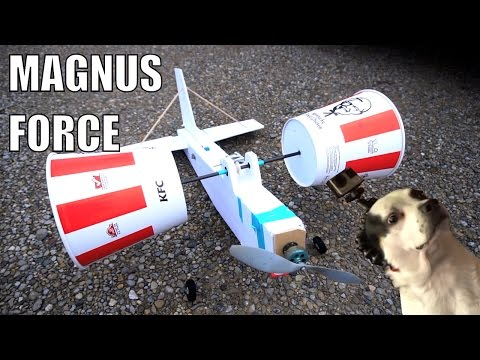

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('K6geOms33Dk',width=700,height=500)

# Conclusion

Présentez une synthèse des résultats et des éléments abordés dans ce TP.



In [1]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)

<a id="top" style="float:left;" href="http://dynfluid.ensam.eu/"><img style="height:100px;" src="https://hpp.education/Lessons/omnes-docet-ubique.png"/></a>
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:80px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center><a href="#top">Retour en haut de la page</a></center>